In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sam_enhancer import SAME
from sam_enhancer import MaxIoU_IMP2
import cv2

In [5]:
image = Image.open('dataset/training/before/before-video-000/frame_0001.jpg')
image = np.array(image.convert("RGB"))

In [ ]:
model = SAME(fast_SAM=True)
model.compute_masks(origin_path="dataset/test_set/images", destination_path="dataset/SAM/masks/test_set")

In [2]:
mask = np.load("dataset/generated/mask_before-video-000_frame-0001.npy")
sam_masks = np.load("dataset/SAM/masks/test_set/before/before-video-000/frame-0001.npz")["data"]

In [3]:
resized_masks = np.array([cv2.resize(tmp, (512, 512), interpolation=cv2.INTER_NEAREST) for tmp in sam_masks])

In [8]:
merger = MaxIoU_IMP2()
merger.merge(mask, "test1", resized_masks, "dataset/SAM/enhanced", prediction_threshold=0.2)

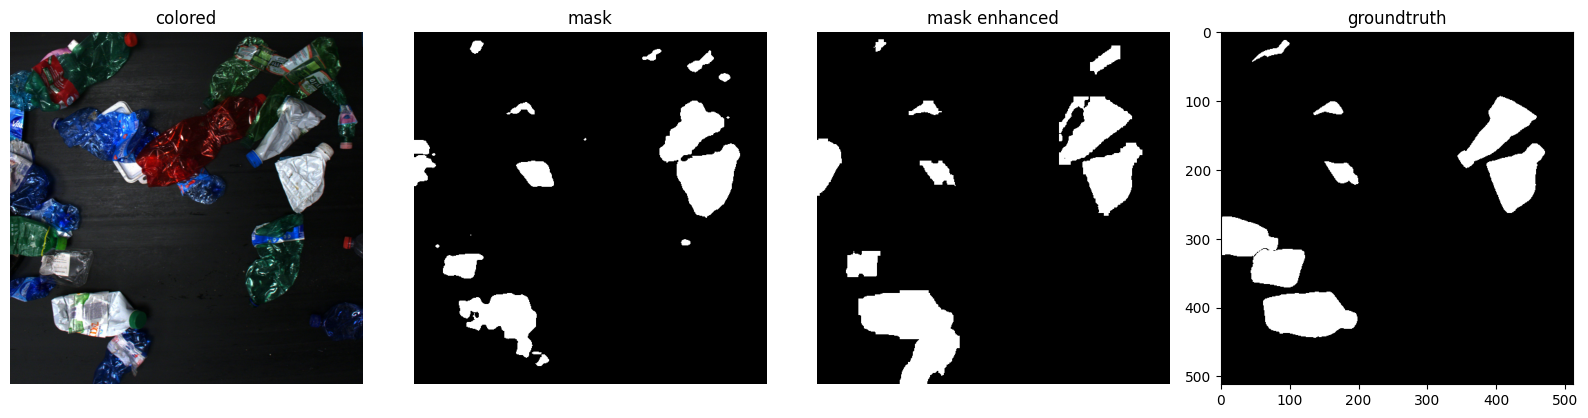

In [ ]:
image = Image.open("dataset/test_set/images/before/before-video-000/frame-0001.jpg")
image3 = Image.open("dataset/SAM/enhanced/test1.png")
image3 = np.array(image3.convert("L"))
groundtruth = Image.open("dataset/test_set/masks/before/before-video-000/frame-0001.jpg")
groundtruth = cv2.resize(np.array(groundtruth), (512, 512), interpolation=cv2.INTER_NEAREST)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Image 1
axes[0].imshow(image)
axes[0].set_title("colored")
axes[0].axis('off')

# Image 2
axes[1].imshow(mask, cmap='gray')
axes[1].set_title("mask")
axes[1].axis('off')

# Image 3
axes[2].imshow(image3, cmap='gray')
axes[2].set_title("mask enhanced")
axes[2].axis('off')

axes[3].imshow(groundtruth, cmap='gray')
axes[3].set_title("groundtruth")
axes[3].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
def IoU(img1, img2):
    intersection = np.logical_and(img1, img2)
    union = np.logical_or(img1, img2)
    return np.sum(intersection) / np.sum(union)



print("IoU between mask and groundtruth: ", IoU(mask, groundtruth))
print("IoU between enhanced mask and groundtruth: ", IoU(np.array(image3), groundtruth))

IoU between mask and groundtruth:  0.5350646052255628
IoU between enhanced mask and groundtruth:  0.5605439854330261
